In [37]:
import numpy as np

In [38]:
input = """(1, 1, 1), (1, 2, 1), (1, 3, 1), (2, 1, 1), (2, 2, 1), (2, 3, 1), (2, 3.5, 1), (2.5, 2, 1), (3.5, 1, 1), (3.5, 2, 1), (3.5, 3, 2), (3.5, 4, 2), (4.5, 1, 2), (4.5, 2, 2), (4.5, 3, 2), (5, 4, 2), (5, 5, 2), (6, 3, 2), (6, 4, 2), (6, 5, 2)"""
arr = input[1:-1].split("), (")
D = 3
N = len(arr)
X = np.zeros((D, N))
count = 0
for i in arr:
  ip = i.split(', ')
  X[:,count] = np.array([float(ip[0]),float(ip[1]),float(ip[2])])
  count += 1

print(X)
print(count)

[[1.  1.  1.  2.  2.  2.  2.  2.5 3.5 3.5 3.5 3.5 4.5 4.5 4.5 5.  5.  6.
  6.  6. ]
 [1.  2.  3.  1.  2.  3.  3.5 2.  1.  2.  3.  4.  1.  2.  3.  4.  5.  3.
  4.  5. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2. ]]
20


class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)

In [39]:
label = np.array(X[2,:])
_X = np.delete(X, 1, 0)
print(_X)

[[1.  1.  1.  2.  2.  2.  2.  2.5 3.5 3.5 3.5 3.5 4.5 4.5 4.5 5.  5.  6.
  6.  6. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2. ]]


In [40]:
pca = PCA(n_components=2) 
pca.fit(_X.T)

PCA(n_components=2)

In [41]:
#3 vector riêng
e = pca.components_.T
print(e)

[[ 0.9675478   0.25268807]
 [ 0.25268807 -0.9675478 ]]


In [42]:
D,K = e.shape

In [43]:
#Ma trận chứa các điểm dữ liệu sau khi chuyển hệ cơ sở
after_pca = pca.transform(_X.T)
print(after_pca.T)

[[-2.49683614 -2.49683614 -2.49683614 -1.52928834 -1.52928834 -1.52928834
  -1.52928834 -1.04551444 -0.07796664 -0.07796664  0.17472142  0.17472142
   1.14226922  1.14226922  1.14226922  1.62604312  1.62604312  2.59359092
   2.59359092  2.59359092]
 [-0.13531187 -0.13531187 -0.13531187  0.1173762   0.1173762   0.1173762
   0.1173762   0.24372024  0.4964083   0.4964083  -0.4711395  -0.4711395
  -0.21845143 -0.21845143 -0.21845143 -0.0921074  -0.0921074   0.16058067
   0.16058067  0.16058067]]


In [44]:
i = np.array(after_pca.T)
new = np.append(i,label.reshape(1,20))
print(new.reshape(3,20))

[[-2.49683614 -2.49683614 -2.49683614 -1.52928834 -1.52928834 -1.52928834
  -1.52928834 -1.04551444 -0.07796664 -0.07796664  0.17472142  0.17472142
   1.14226922  1.14226922  1.14226922  1.62604312  1.62604312  2.59359092
   2.59359092  2.59359092]
 [-0.13531187 -0.13531187 -0.13531187  0.1173762   0.1173762   0.1173762
   0.1173762   0.24372024  0.4964083   0.4964083  -0.4711395  -0.4711395
  -0.21845143 -0.21845143 -0.21845143 -0.0921074  -0.0921074   0.16058067
   0.16058067  0.16058067]
 [ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          2.          2.
   2.          2.          2.          2.          2.          2.
   2.          2.        ]]


In [45]:
#Chuyển ngược về ma trận ban đầu 
inverse = pca.inverse_transform(after_pca)
print(inverse.T)

[[1.  1.  1.  2.  2.  2.  2.  2.5 3.5 3.5 3.5 3.5 4.5 4.5 4.5 5.  5.  6.
  6.  6. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2. ]]


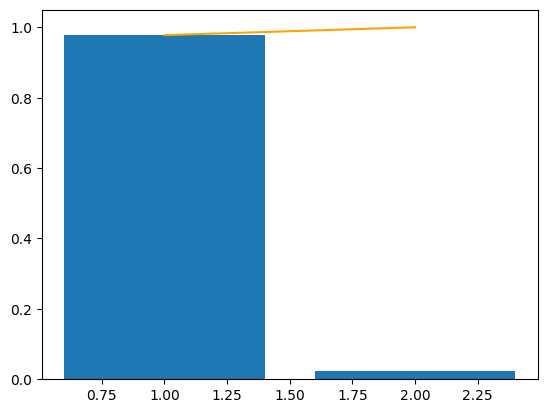

In [46]:
import matplotlib.pyplot as plt
x = np.arange(1, D+1)
y = pca.explained_variance_ratio_
sum = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]
_y = [pca.explained_variance_ratio_[0]/sum,1]
plt.plot(x,_y,color = 'orange')
plt.bar(x, y)
plt.show()